In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read csv file
dataset = pd.read_csv('./csvfiles/output_training.csv')
dataset['merchanttype'] = dataset['merchanttype'].astype('category')
dataset['merchantname'] = dataset['merchantname'].astype('category')
dataset['topads'] = dataset['topads'].replace((1,0), ('yes', 'no'))
dataset['topads'] = dataset['topads'].astype('category')
# drop column 'id' and 'prodname'
dataset = dataset.drop(['id', 'prodname', 'merchantname', 'actualrevcount'], axis=1)
# some 'revpictotal' has 9999 value and most of them have
# 'actualrevcount' = 10, only 5a986371b8a9f712ce73da7f has 119 'actualrevcount'
# replace 9999 with np.nan
dataset['revpictotal'] = dataset['revpictotal'].replace(9999, np.nan)
# data imputation
# mean technique
meanway = dataset['revpictotal'].mean()
dataset['revpictotal'] = dataset['revpictotal'].fillna(meanway)

In [5]:
dataset.iloc[:, 0:10].head(10)

,merchanttype,topads,cashback,cashbackval,price,prodrating,reviewcount,negreview,posreview,answerscnt
0,biasa,no,0.0,0.0,28877,4.8,3200,0.005330,0.994670,1301
1,gold,no,0.0,0.0,103000,4.6,3100,0.006742,0.993258,2336
2,gold,no,0.0,0.0,2500,4.8,2200,0.004630,0.995370,280
3,gold,no,0.0,0.0,570000,4.8,2100,0.001577,0.998423,1417
4,gold,no,0.0,0.0,159000,4.5,2100,0.020270,0.979730,2541
5,biasa,no,0.0,0.0,23777,4.8,200,0.000000,1.000000,700
6,biasa,no,0.0,0.0,85000,4.3,1900,0.038462,0.961538,1773
7,gold,no,0.0,0.0,74000,4.1,1900,0.067227,0.932773,1314
8,gold,no,0.0,0.0,22500,4.7,1800,0.009804,0.990196,2258
9,gold,no,0.0,0.0,99000,4.5,1700,0.018405,0.981595,1275


In [4]:
dataset.describe()

,cashback,cashbackval,price,prodrating,reviewcount,negreview,posreview,answerscnt,otheragreemean,ratingmosthelpful,possentiment,negsentiment,sentipolarity,reviewersrep,revpictotal,prodpicstotal,ranking
count,41596.000000,41596.000000,4.159600e+04,41596.000000,41596.000000,41596.000000,41596.000000,41596.000000,41596.000000,41596.000000,41596.000000,41596.000000,41596.000000,41596.0,41596.000000,41596.000000,41596.000000
mean,0.001125,228.700575,2.489824e+05,4.725113,44.338903,0.010768,0.989232,35.129363,0.002909,1.515843,3.252957,-1.064069,0.998365,1.0,10.123301,0.592557,20798.500000
std,0.006985,6191.385698,9.518654e+05,0.219873,85.406325,0.037130,0.037130,76.364433,0.056472,2.193405,0.585073,0.245956,0.045441,0.0,15.468910,1.477846,12007.630252
min,0.000000,0.000000,1.000000e+02,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,1.000000,-3.000000,-1.000000,1.0,0.000000,0.000000,86.000000
25%,0.000000,0.000000,1.600000e+04,4.600000,11.000000,0.000000,1.000000,7.000000,0.000000,0.000000,3.000000,-1.000000,1.000000,1.0,5.000000,0.000000,10221.500000
50%,0.000000,0.000000,6.000000e+04,4.800000,22.000000,0.000000,1.000000,16.000000,0.000000,0.000000,3.000000,-1.000000,1.000000,1.0,8.000000,0.000000,20768.000000
75%,0.000000,0.000000,1.699000e+05,4.900000,45.000000,0.000000,1.000000,35.000000,0.000000,4.000000,4.000000,-1.000000,1.000000,1.0,10.123301,1.000000,31214.000000
max,0.050000,687500.000000,5.500000e+07,5.000000,3200.000000,0.666667,1.000000,2541.000000,4.000000,5.000000,5.000000,-1.000000,1.000000,1.0,653.000000,48.000000,41596.000000


In [26]:
??dataset.describe

In [8]:
dataset.corr()

,cashback,cashbackval,price,prodrating,reviewcount,negreview,posreview,answerscnt,otheragreemean,ratingmosthelpful,possentiment,negsentiment,sentipolarity,reviewersrep,revpictotal,prodpicstotal,ranking
cashback,1.000000,0.218530,-0.007717,0.023076,0.014006,-0.001997,0.001997,0.011090,0.003896,0.000030,0.006863,-0.003538,0.005792,NaN,0.011172,0.016838,-0.022165
cashbackval,0.218530,1.000000,0.145076,0.021699,-0.006822,-0.005238,0.005238,-0.002825,-0.001061,-0.005495,0.007048,-0.002623,0.001329,NaN,-0.007769,0.004208,-0.019422
price,-0.007717,0.145076,1.000000,0.090282,-0.048532,-0.026412,0.026412,0.004663,0.003618,-0.032779,0.077927,-0.017663,0.002596,NaN,-0.043396,0.001443,-0.152302
prodrating,0.023076,0.021699,0.090282,1.000000,-0.142128,-0.481114,0.481114,-0.162254,0.008832,0.000032,0.153389,0.102972,0.046459,NaN,-0.092113,-0.024718,-0.137844
reviewcount,0.014006,-0.006822,-0.048532,-0.142128,1.000000,0.070636,-0.070636,0.780897,-0.001959,0.263347,-0.056027,0.047423,0.006232,NaN,0.880343,0.612915,0.419492
negreview,-0.001997,-0.005238,-0.026412,-0.481114,0.070636,1.000000,-1.000000,0.099056,-0.007402,-0.005602,-0.113034,-0.151591,-0.074903,NaN,0.042394,0.030878,0.046903
posreview,0.001997,0.005238,0.026412,0.481114,-0.070636,-1.000000,1.000000,-0.099056,0.007402,0.005602,0.113034,0.151591,0.074903,NaN,-0.042394,-0.030878,-0.046903
answerscnt,0.011090,-0.002825,0.004663,-0.162254,0.780897,0.099056,-0.099056,1.000000,0.007422,0.249669,-0.027165,0.017674,0.003671,NaN,0.745995,0.692477,0.289236
otheragreemean,0.003896,-0.001061,0.003618,0.008832,-0.001959,-0.007402,0.007402,0.007422,1.000000,-0.024731,0.010472,-0.002160,0.001853,NaN,-0.004151,-0.001642,-0.007949
ratingmosthelpful,0.000030,-0.005495,-0.032779,0.000032,0.263347,-0.005602,0.005602,0.249669,-0.024731,1.000000,0.059392,0.023829,0.018109,NaN,0.281503,0.273443,0.228487


In [11]:
sns.heatmap(dataset.corr(), annot=True, fmt='.3f')

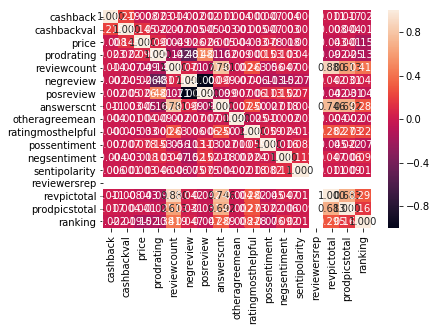

In [12]:
plt.show()

In [13]:
corr = dataset.corr()

In [21]:
plt.figure(figsize=(12, 7))

<Figure size 864x504 with 0 Axes>

In [22]:
#https://www.kaggle.com/ekami66/detailed-exploratory-data-analysis-with-python
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)

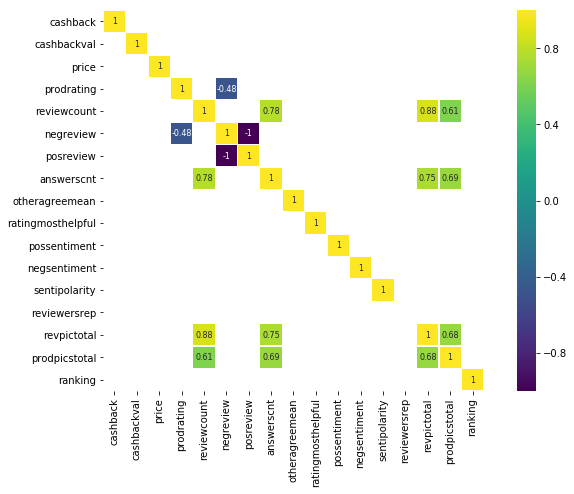

In [23]:
plt.show()

In [17]:
??plt.figure

In [12]:
test = dataset[['reviewcount', 'ranking']]

In [24]:
test.plot.scatter(y='reviewcount', x='ranking')

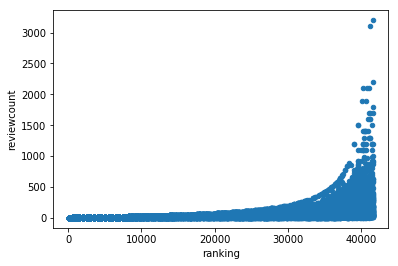

In [25]:
plt.show()

In [15]:
test.head()

,reviewcount,ranking
0,3200,41580.0
1,3100,41233.5
2,2200,41571.0
3,2100,41052.5
4,2100,40821.5


In [17]:
plt.clf()

In [2]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    # https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/
    n_vars = 1 if type(data) is list else data.shape[1]
    df = data.copy()
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]

    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]

    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg = agg.dropna()
    return agg

# terasvirta and granger causality

<br>pilihan:
>     2 data di database product.db dgn review > 900:
>         5aa2ad7735d6d34b0032a795
>         5aa39533ae1f941be7165ecd
>     cluster 2
>         5a93e8768cbad97881597597
>         or 
>         5a95d7ae35d6d33d3fea56ff
>     cluster 1
>         5aa2c35e35d6d34b0032a796
>     cluster 3 
>         5a92474635d6d32207bcd343
</br>

In [3]:
import tseriesRoutines as routines
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sqlite3

In [4]:
# make connection to sqlite db
conn = sqlite3.connect('product.db')
c = conn.cursor()

# enable foreign keys
c.execute("PRAGMA foreign_keys = ON")
conn.commit()

In [5]:
# get list of products and turn it into dataframe
productlist = routines.sqlToDf(conn, c)

In [99]:
# result reproducibility
np.random.seed(42)
# get data
product = productlist.selectReview3('5a9347b98cbad97074cb1890', impute=False)
product2 = routines.tsSalesRateSentiment(product, freq='daily')

In [100]:
product2.shape

(317, 3)

In [101]:
# bandwidth
bandwidth = max((8.62 * product2.shape[0]**(-2/7)), 1.5)
print(str(bandwidth))

1.663102074152365


In [106]:
# nonparametric causality
tstest = routines.tsTest(product2, product.loc[0,'id'])
tstest.granger(nonparametric=True, embdim='5', bandwidth=str(bandwidth))

5a9347b98cbad97074cb1890
Sales -> rating
Sales -> ovsentiment
rating -> Sales
rating -> ovsentiment
ovsentiment -> Sales
ovsentiment -> rating


In [69]:
# terasvirta
tstest.terasvirta()

5aa2ad7735d6d34b0032a795
Sales ->  rating; pvalue: 0.0
Sales ->  ovsentiment; pvalue: 0.0
rating ->  Sales; pvalue: 2.886579864025407e-15
rating ->  ovsentiment; pvalue: 0.2801773293824703
ovsentiment ->  Sales; pvalue: 0.0
ovsentiment ->  rating; pvalue: 0.0


In [70]:
# granger causality
tstest.granger(5)

5aa2ad7735d6d34b0032a795
Sales -> rating

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.7848  , p=0.0958  , df_denom=476, df_num=1
ssr based chi2 test:   chi2=2.8024  , p=0.0941  , df=1
likelihood ratio test: chi2=2.7942  , p=0.0946  , df=1
parameter F test:         F=2.7848  , p=0.0958  , df_denom=476, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.2062  , p=0.0414  , df_denom=473, df_num=2
ssr based chi2 test:   chi2=6.4802  , p=0.0392  , df=2
likelihood ratio test: chi2=6.4367  , p=0.0400  , df=2
parameter F test:         F=3.2062  , p=0.0414  , df_denom=473, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.4221  , p=0.0653  , df_denom=470, df_num=3
ssr based chi2 test:   chi2=7.3746  , p=0.0609  , df=3
likelihood ratio test: chi2=7.3182  , p=0.0624  , df=3
parameter F test:         F=2.4221  , p=0.0653  , df_denom=470, df_num=3

Granger Causality
number of lags (no zero) 4
ssr bas

In [29]:
df1 = productlist.selectReview3('5aa2ad7735d6d34b0032a795', impute=True)

In [30]:
df1.head()

,id,date,Sales,rating,ovsentiment
0,5aa2ad7735d6d34b0032a795,2016-11-06,104,3.500000,0.500000
1,5aa2ad7735d6d34b0032a795,2016-11-07,77,5.000000,1.000000
2,5aa2ad7735d6d34b0032a795,2016-11-08,93,0.000000,0.000000
3,5aa2ad7735d6d34b0032a795,2016-11-09,95,0.000000,0.000000
4,5aa2ad7735d6d34b0032a795,2016-11-10,77,4.666667,0.333333


In [31]:
df2 = productlist.selectReview3('5aa2ad7735d6d34b0032a795', impute=False)

In [32]:
df2.head()

,id,date,Sales,rating,ovsentiment
0,5aa2ad7735d6d34b0032a795,2016-11-06,2,3.500000,0.500000
1,5aa2ad7735d6d34b0032a795,2016-11-07,1,5.000000,1.000000
2,5aa2ad7735d6d34b0032a795,2016-11-08,0,0.000000,0.000000
3,5aa2ad7735d6d34b0032a795,2016-11-09,0,0.000000,0.000000
4,5aa2ad7735d6d34b0032a795,2016-11-10,3,4.666667,0.333333


In [35]:
dftrain = series_to_supervised(product2)
dftrain = dftrain.drop(dftrain.columns[[4, 5]], axis=1)
values = dftrain.values

,var1(t-1),var2(t-1),var3(t-1),var1(t),var2(t),var3(t)
date,,,,,,
2016-11-07,101.0,3.500000,0.500000,80,5.000000,1.000000
2016-11-08,80.0,5.000000,1.000000,89,0.000000,0.000000
2016-11-09,89.0,0.000000,0.000000,89,0.000000,0.000000
2016-11-10,89.0,0.000000,0.000000,86,4.666667,0.333333
2016-11-11,86.0,4.666667,0.333333,88,0.000000,0.000000


In [46]:
df = routines.showClusterData(conn, c, 1, sortby=['actualrevcount'])
df[df['actualrevcount'] >= 30].sort_values(by='ranking')

,id,ranking,actualrevcount,salescluster
2041,5aa99b7aae1f947c2f83f454,20628.0,31.0,1.0
1822,5a962bf5ae1f945c819c4dc3,20907.0,31.0,1.0
2023,5a93f487f97c5d0e650eda25,21056.5,31.0,1.0
1826,5a958bd6ae1f944fee36abbf,21056.5,31.0,1.0
1834,5a95844fae1f944fee36abb8,21458.5,31.0,1.0
1570,5ab22a4b35d6d37a7a78ae35,21714.0,34.0,1.0
1659,5a9347b98cbad97074cb1890,22397.5,34.0,1.0
1619,5a9622adae1f945c819c4dbc,22519.5,34.0,1.0
1684,5aa2892a35d6d35fe0a20e29,22519.5,34.0,1.0
1577,5a94e3a5b8a9f779d9020f1e,22633.0,34.0,1.0


In [45]:
df[df['actualrevcount'] >= 30].sort_values(by='ranking')

,id,ranking,actualrevcount,salescluster
2041,5aa99b7aae1f947c2f83f454,20628.0,31.0,1.0
1822,5a962bf5ae1f945c819c4dc3,20907.0,31.0,1.0
2023,5a93f487f97c5d0e650eda25,21056.5,31.0,1.0
1826,5a958bd6ae1f944fee36abbf,21056.5,31.0,1.0
1834,5a95844fae1f944fee36abb8,21458.5,31.0,1.0
1570,5ab22a4b35d6d37a7a78ae35,21714.0,34.0,1.0
1659,5a9347b98cbad97074cb1890,22397.5,34.0,1.0
1619,5a9622adae1f945c819c4dbc,22519.5,34.0,1.0
1684,5aa2892a35d6d35fe0a20e29,22519.5,34.0,1.0
1577,5a94e3a5b8a9f779d9020f1e,22633.0,34.0,1.0


## Validasi Model Peramalan 